<a href="https://colab.research.google.com/github/Geetika2282/Deep-Learning/blob/main/Tensorflow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def fn_plot_tf_hist(hist_df):

    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index
            so that even if the column names are different it will not throw exceptions.
    '''

    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm

    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]

    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(),
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)

    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow


    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')

    plt.tight_layout()

In [ ]:
#!/usr/bin/env pyhton3
# -*- coding
import os
import sys
sys.path.append(os.path.abspath('/path/to/your/utils/module'))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

# Global variables
RANDOM_STATE = 24

rng = np.random.RandomState(seed = RANDOM_STATE)

N_SAMPLE = 1000
TEST_SIZE = 0.2
ALPHA = 0.1 # learning rate
NOISE = 0.2 # Error
EPOCHS = 20000

inpDir = './input'
outDir = './output'

In [ ]:
x,y = datasets.make_moons(
        n_samples = N_SAMPLE,
        noise = NOISE,
        shuffle  = True,
        random_state = RANDOM_STATE
)
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE,stratify = y, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,), name = 'input'), # input layer
    tf.keras.layers.Dense(5, activation = 'relu', name = 'fc_1'), # Hidden layer called dense in tensorflow
    tf.keras.layers.Dense(5, activation = 'relu',  name = 'fc_2'),# node called as unit
    tf.keras.layers.Dense(4, activation = 'relu', name = 'fc_3'),# fully connected layer(Fc)
    tf.keras.layers.Dense(3, activation = 'relu',  name = 'fc_4'),
    tf.keras.layers.Dense(2, name = 'output')

])

In [ ]:
 tf.keras.layers.Dense?

In [ ]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-1.4809976

In [ ]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                         │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_3 (Dense)                         │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_4 (Dense)                         │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

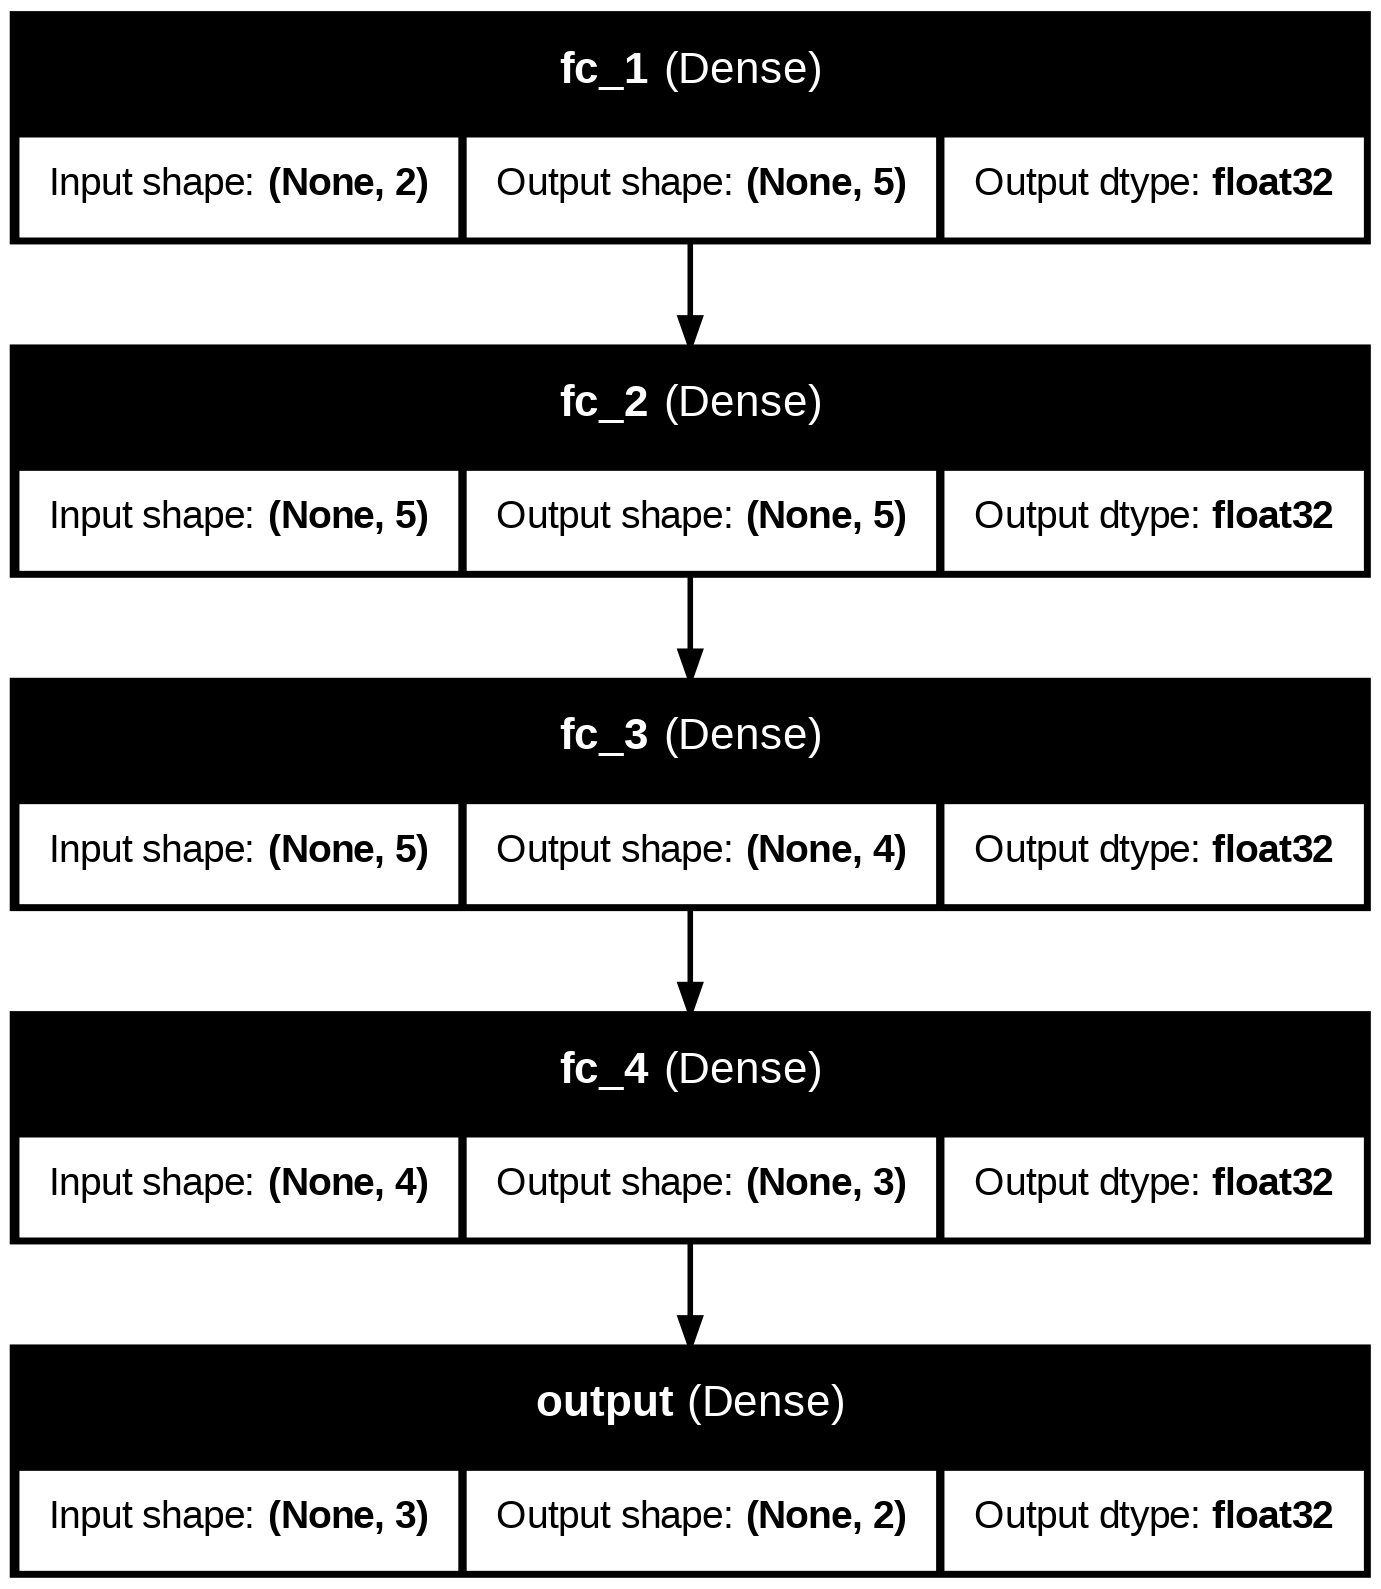

In [ ]:
tf.keras.utils.plot_model(model, "My_first_model.png",
                         show_shapes = True,show_dtype=True,
                         show_layer_names = True)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) # y_test, y_pred shape should be equal

In [ ]:
loss_fn(y_train[:1], prediction).numpy()

1.2237931

In [ ]:
model.compile(optimizer = 'adam',
             loss = loss_fn,
              metrics = ['accuracy']
             )

In [ ]:
history = model.fit(x = X_train, y = y_train,
                    validation_data = [X_test, y_test],
                    epochs =EPOCHS
                   )

Streaming output truncated to the last 5000 lines.
Epoch 17501/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4955 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 17502/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5216 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 17503/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5232 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 17504/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4953 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 17505/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4623 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 17506/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 17507/20000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4676 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 17508/20000


,accuracy,loss,val_accuracy,val_loss
0,0.28500,0.773739,0.265,0.754301
1,0.21625,0.740786,0.215,0.727979
2,0.20625,0.717052,0.230,0.706415
3,0.34000,0.700648,0.465,0.695039
4,0.48750,0.694188,0.495,0.693510


<Axes: >

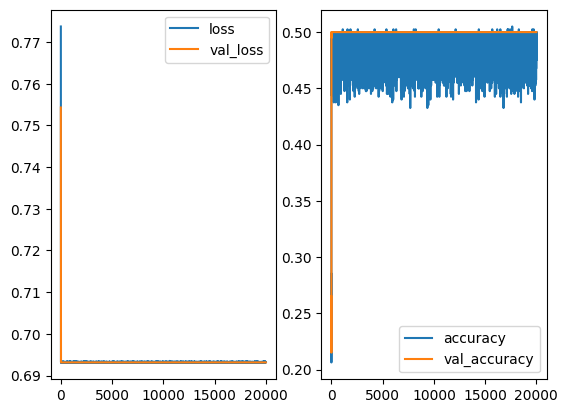

In [ ]:
hist_df = pd.DataFrame(history.history) #Dictionary
display(hist_df.head())
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])



In [ ]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.28500,0.773739,0.265,0.754301
1,0.21625,0.740786,0.215,0.727979
2,0.20625,0.717052,0.230,0.706415
3,0.34000,0.700648,0.465,0.695039
4,0.48750,0.694188,0.495,0.693510
...,...,...,...,...
19995,0.48500,0.693180,0.500,0.693147
19996,0.48000,0.693235,0.500,0.693148
19997,0.49500,0.693210,0.500,0.693148
19998,0.50000,0.693170,0.500,0.693147


In [ ]:
fn_plot_tf_hist(hist_df = hist_df)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Error in callback <function _draw_all_if_interactive at 0x7ec5d972e4d0> (for post_execute):


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1500x600 with 2 Axes>

In [ ]:
y_pred = model.predict(X_train)
accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

In [ ]:
cm = confusion_matrix(y_true=y_train, y_pred= y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

In [ ]:
y_pred = predict(model, X_test)
accuracy_score(y_true = y_test, y_pred = y_pred)